# Basic exploration notebook

This notebook has been developed to perform exploratory data analysis on the cleaned dataset.

The goals are:
- Validation cleaning proccess 
- First inspection of distributions
- Varialbe relationships and preselection


Brief conclusion of the dataset:
- Some variable are highly correlated:
    - VerifianceCPT1, 2, and 3
    - DiffDateTr1, 2, and 3
    - CA3TRetMtt and CA3TR

- Very low representation of the positive (fraudulus transactions): 0.6%

-> 

In [13]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the pickle file
with open("../data/cleaned_data.pkl", "rb") as file:
    df = pickle.load(file)

In [3]:
df.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,...,37.186668,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,27134
1,A013011306908024927155000,78643045,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,...,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,27817
2,A013010002908283134592527,78643046,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,...,73.118280,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00,28058
3,A011010002908105209831316,78643047,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,...,110.056926,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00,28128
4,A013010041908000125652029,78643048,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,...,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,29607


In [8]:
df.describe()

,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
count,4.646772e+06,4.646772e+06,4646772,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06,4.646772e+06
mean,6.455019e-03,6.014215e+01,2017-05-18 06:35:25.756339968,2.516035e-01,2.295273e-01,2.452963e-01,2.716445e-01,3.139047e+02,2.217686e+00,2.033179e+00,1.373318e-01,3.912727e+01,3.850640e+01,1.036989e+00,3.873620e+00,4.166527e+00,4.199613e+00,6.730031e+01,7.158164e+00,5.248595e+04
min,0.000000e+00,1.000000e-02,2017-02-01 07:32:14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-6.446148e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.703704e-04,7.754630e-04,1.000000e-02,0.000000e+00,1.822500e+04
25%,0.000000e+00,2.598000e+01,2017-03-11 18:03:27.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01,5.631127e-03,-1.481722e+00,1.185316e-03,2.223457e+01,2.875694e+01,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.940000e+01,0.000000e+00,4.148500e+04
50%,0.000000e+00,4.412000e+01,2017-04-20 15:18:41.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.870000e+02,1.096892e-02,1.636846e-01,1.728123e-03,3.433578e+01,3.681303e+01,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.941000e+01,0.000000e+00,5.347750e+04
75%,0.000000e+00,7.304000e+01,2017-07-16 12:10:35.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.320000e+02,4.344547e-02,7.354219e+00,5.157858e-03,4.658322e+01,5.088256e+01,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,8.282000e+01,0.000000e+00,6.287700e+04
max,1.000000e+00,1.212600e+05,2017-11-30 22:07:13,3.000000e+00,1.600000e+01,2.600000e+01,3.200000e+01,5.510000e+02,2.049888e+04,5.240133e+01,1.649094e+01,1.000000e+04,1.276970e+02,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.212600e+05,1.560000e+04,8.195800e+04
std,8.008341e-02,1.019927e+02,NaN,4.475842e-01,4.422162e-01,4.965439e-01,5.812738e-01,2.207225e+02,2.709370e+01,9.715522e+00,4.867118e-01,6.011575e+01,1.673441e+01,1.920397e-01,1.059257e+00,5.171842e-01,4.242341e-01,1.114365e+02,3.860036e+01,1.187262e+04


<Axes: >

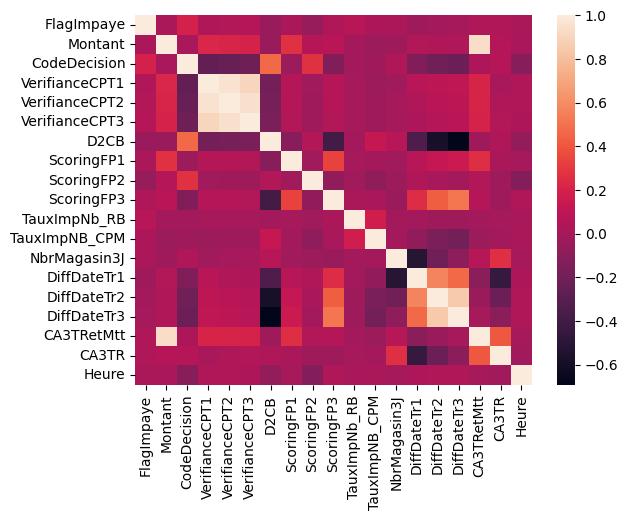

In [ ]:
sns.heatmap(df.select_dtypes(include=["number"]).corr())

Lot of redundancy observed for the following variables:
- VerifianceCPT1, 2, and 3
- DiffDateTr1, 2, and 3
- CA3TRetMtt and CA3TR

In [4]:
df["FlagImpaye"].value_counts(normalize=True) * 100

FlagImpaye
0    99.354498
1     0.645502
Name: proportion, dtype: float64

<Axes: title={'center': 'Montant'}, xlabel='FlagImpaye'>

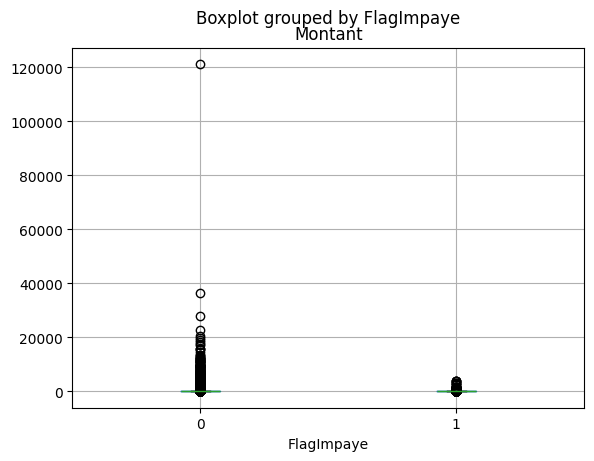

In [5]:
# Check cost distribution of fraudulent vs non-fraudulent transactions
df.boxplot(column="Montant", by="FlagImpaye")

In [6]:
# Range price of fraudulent transactions
fraudulent = df[df["FlagImpaye"] == 1]
print("Fraudulent transactions cost range:")
print("Min:", fraudulent["Montant"].min())
print("Max:", fraudulent["Montant"].max())
print("Mean:", fraudulent["Montant"].mean())
print("Median:", fraudulent["Montant"].median())

Fraudulent transactions cost range:
Min: 1.43
Max: 3775.27
Mean: 94.70240240040008
Median: 60.01


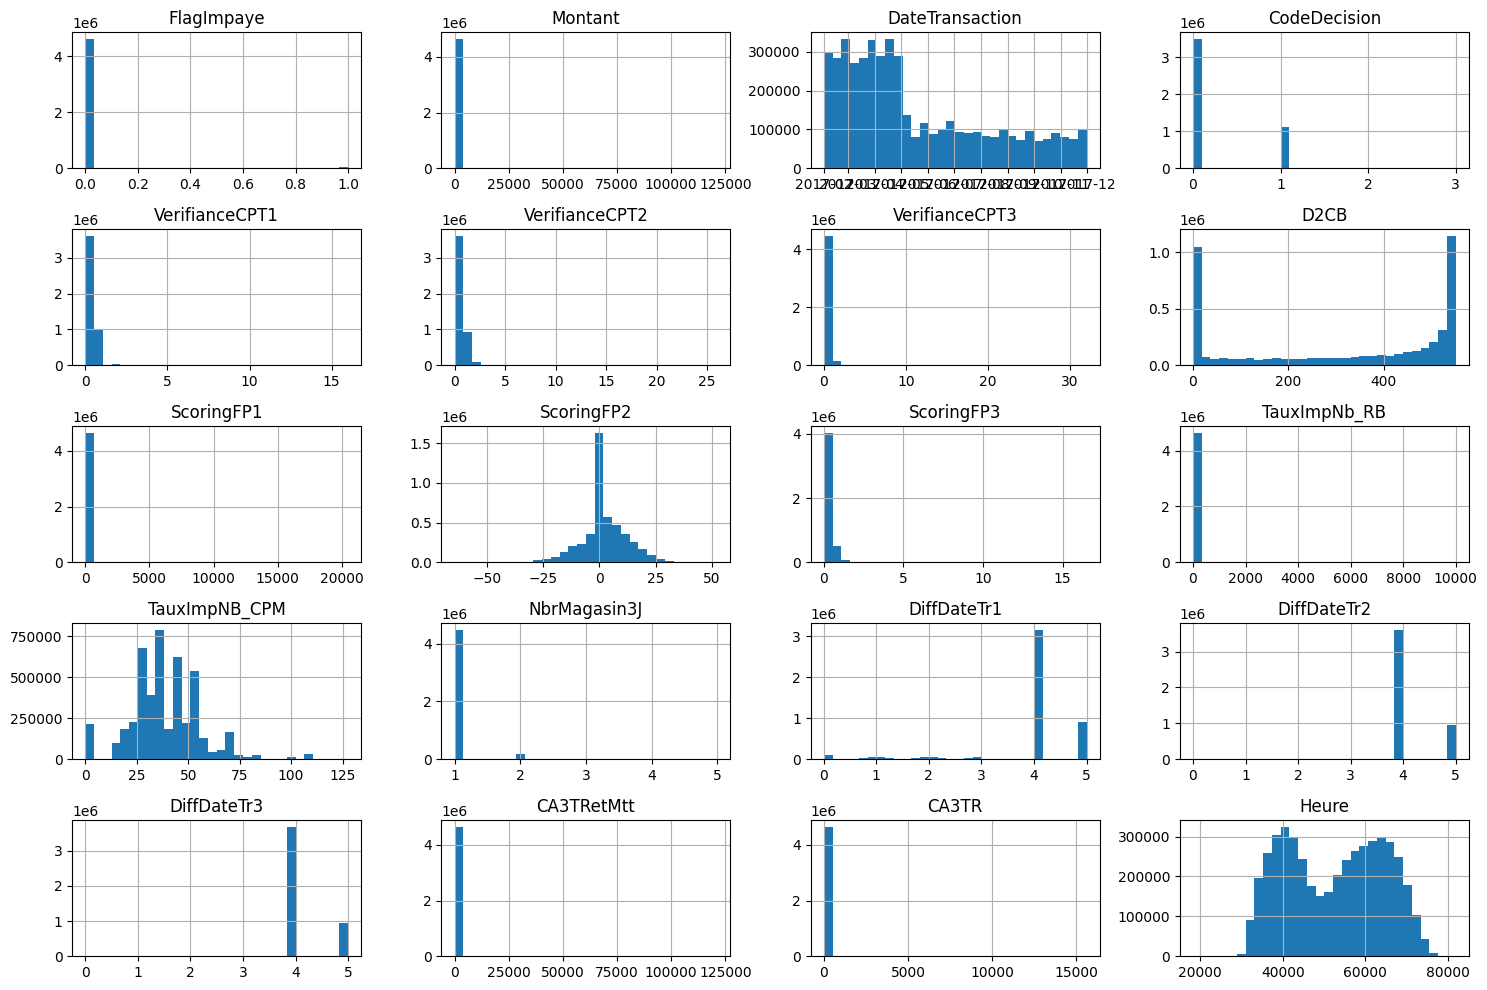

In [7]:
# Distribution of each variables
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()